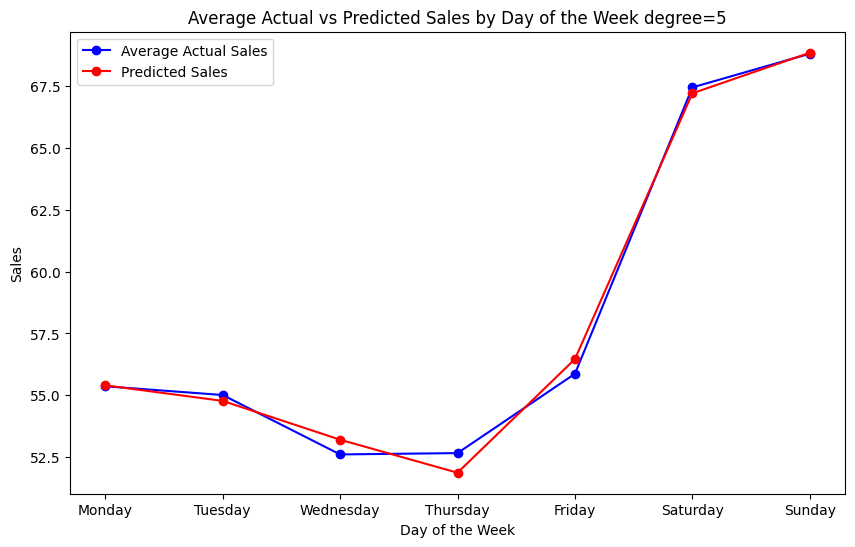

In [1]:
# 匯入所需的套件 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degree=5
# 建立多項式特徵轉換器（2 次多項式）
poly = PolynomialFeatures(degree=5)

# 讀取銷售資料集（CSV 檔）
yearly_sales_data = pd.read_csv(R'C:\Users\jack\AppData\Local\Programs\Python\Python313\training code\salesdata.csv')

# 假設資料中有 'DayOfWeek' 欄位（1~7），以及對應的 'Sales' 欄位
X_train = yearly_sales_data[['DayOfWeek']].values    # 特徵：星期幾（1~7）
y_train = yearly_sales_data['Sales'].values          # 標籤：銷售金額

# 多項式轉換 + 模型訓練
X_train_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 預測一週（星期一到星期日）的銷售金額
X_week = np.arange(1, 8).reshape(-1, 1)
X_week_poly = poly.transform(X_week)                 # 使用同一個 poly 轉換器
y_week_pred = model.predict(X_week_poly)

# 計算每星期幾的實際平均銷售金額（用於比較）
weekly_sales_avg = yearly_sales_data.groupby('DayOfWeek')['Sales'].mean().reset_index()

# 繪圖：實際平均 vs 預測銷售金額（按星期幾）
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_avg['DayOfWeek'], weekly_sales_avg['Sales'], 'bo-', label='Average Actual Sales')
plt.plot(X_week, y_week_pred, 'ro-', label='Predicted Sales')

plt.title(f'Average Actual vs Predicted Sales by Day of the Week degree={degree}')  
plt.xlabel('Day of the Week')
plt.xticks(np.arange(1, 8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Sales')
plt.legend()
plt.show()